Загрузка библиотек

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка датафрейма

In [62]:
df = pd.read_csv('./dataframes/train.csv')

# Обработка данных

а. Определение и обработка отсутствующих значений

In [63]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Заполнение пропущенных числовых значений медианой

In [64]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

Заполнение пропущенных категориальных значений модой

In [65]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

b. Проверка на дублирующиеся строки

In [66]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()

c. Проверка и преобразование типов данных

In [67]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [68]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Разверточный анализ данных

а. Распределение целевой переменной 'SalePrice'

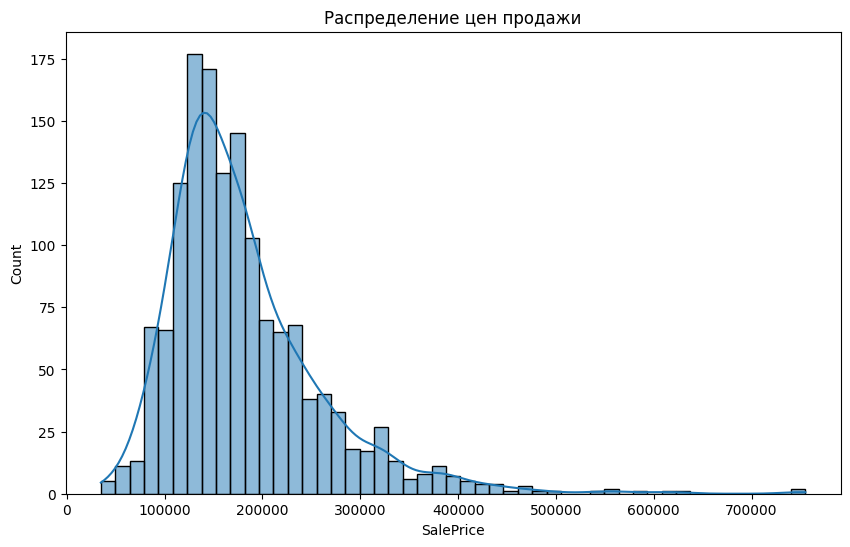

In [69]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение цен продажи')
plt.show()

Поиск выбросов

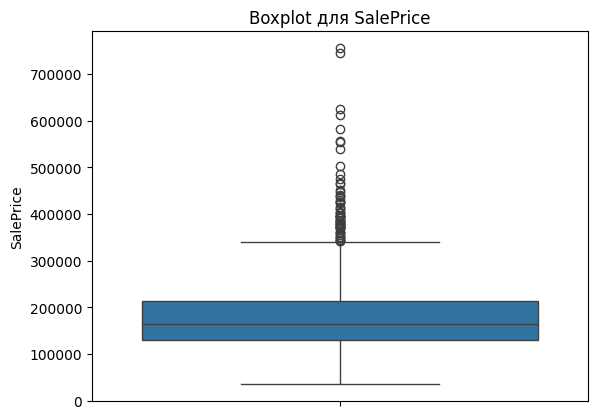

In [70]:
sns.boxplot(df['SalePrice'])
plt.title('Boxplot для SalePrice')
plt.show()

b. Взаимосвязь целевой переменной с другими характеристиками

In [71]:
correlation_matrix = df.corr()
strong_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(f"Сильные корреляции с 'Saleprice': \r\n{strong_corr.head(10)}")

Сильные корреляции с 'Saleprice': 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


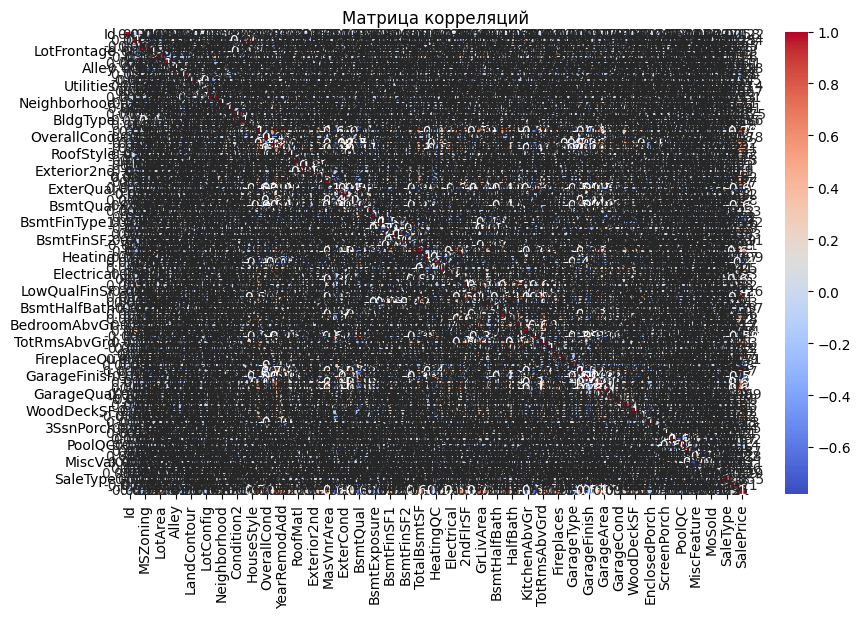

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

c. Исследование распределений и взаимосвязей характеристик

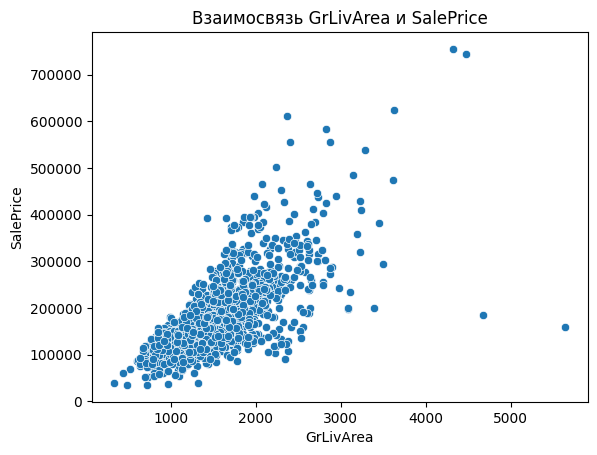

In [73]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Взаимосвязь GrLivArea и SalePrice')
plt.show()

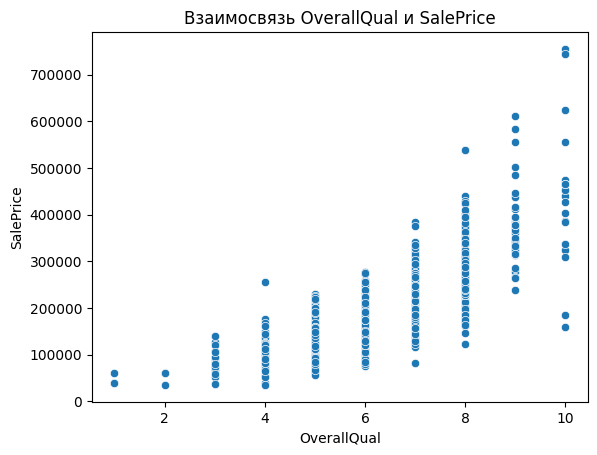

In [74]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Взаимосвязь OverallQual и SalePrice')
plt.show()

# Проектирование признаков

а. One-hot encoding для категориальных переменных

In [75]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,8,4,142125


b. Создание новых характеристик

In [76]:
df_encoded['TotalSF'] = df_encoded['TotalBsmtSF'] + df_encoded['1stFlrSF'] + df_encoded['2ndFlrSF']
df_encoded['HouseAge'] = df_encoded['YrSold'] - df_encoded['YearBuilt']

Проверка на пропущенные значения

In [77]:
df_encoded.isnull().sum().sum()

np.int64(0)

Сохранение обработанного датасета

In [78]:
df_encoded.to_csv('cleaned_house_prices.csv', index=False)